In [1]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: ‘auto-mpg.data.1’

auto-mpg.data.1     100%[===================>]  29.58K  44.9KB/s    in 0.7s    

2020-09-02 21:06:37 (44.9 KB/s) - ‘auto-mpg.data.1’ saved [30286/30286]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
columns = ['mpg', 'cylinders', 'displacement','horsepower',
          'weight', 'acceleration', 'model year', 'origin']

df = pd.read_csv('./auto-mpg.data', names=columns, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

data = df.copy()

data.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
67,11.0,8,429.0,208.0,4633.0,11.0,72,1
335,35.0,4,122.0,88.0,2500.0,15.1,80,2
257,19.4,6,232.0,90.0,3210.0,17.2,78,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
178,23.0,4,120.0,88.0,2957.0,17.0,75,2
239,30.0,4,97.0,67.0,1985.0,16.4,77,3
128,15.0,6,250.0,100.0,3336.0,17.0,74,1
133,16.0,6,250.0,100.0,3781.0,17.0,74,1
325,44.3,4,90.0,48.0,2085.0,21.7,80,2
166,13.0,8,302.0,129.0,3169.0,12.0,75,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [5]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [6]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


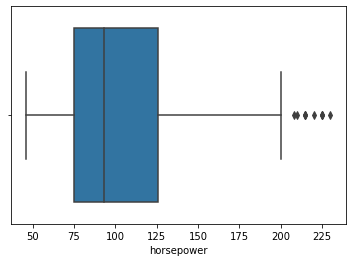

In [7]:
sns.boxplot(x=data.horsepower)

- Since, mean is sensitive to outliers - It is good to replace missing values with median.

In [8]:
median = data['horsepower'].median()
data['horsepower'] = data['horsepower'].fillna(median)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [9]:
data['cylinders'].value_counts()/ len(data)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: cylinders, dtype: float64

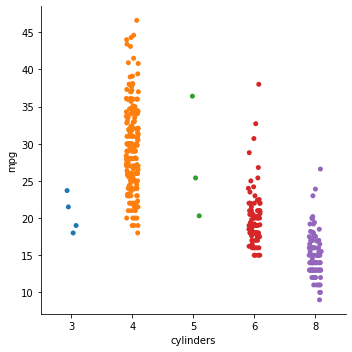

In [10]:
sns.catplot(x='cylinders',y='mpg',data=data)

- It is clear that more than 50% of the vehicles are having 4 cylinders

In [11]:
data['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [12]:
data.drop(['origin','model year'],1)

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504.0,12.0
1,15.0,8,350.0,165.0,3693.0,11.5
2,18.0,8,318.0,150.0,3436.0,11.0
3,16.0,8,304.0,150.0,3433.0,12.0
4,17.0,8,302.0,140.0,3449.0,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6
394,44.0,4,97.0,52.0,2130.0,24.6
395,32.0,4,135.0,84.0,2295.0,11.6
396,28.0,4,120.0,79.0,2625.0,18.6


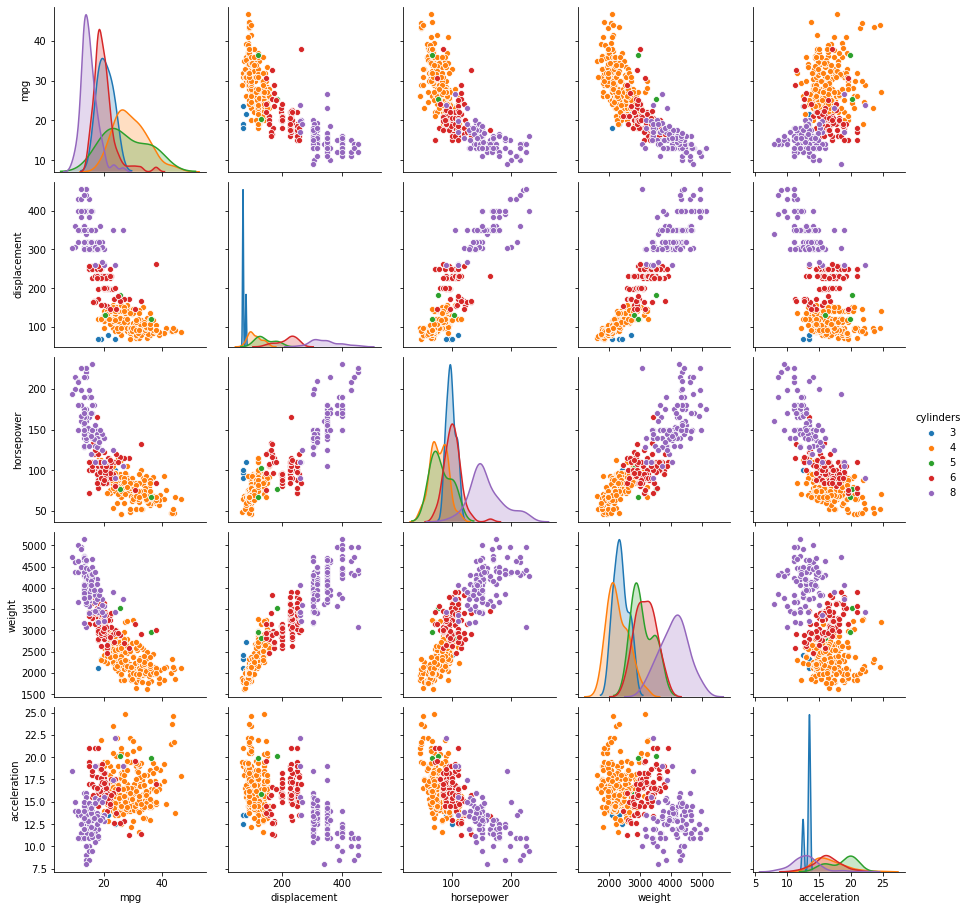

In [13]:
sns.pairplot(data.drop(['origin','model year'],1), hue='cylinders')

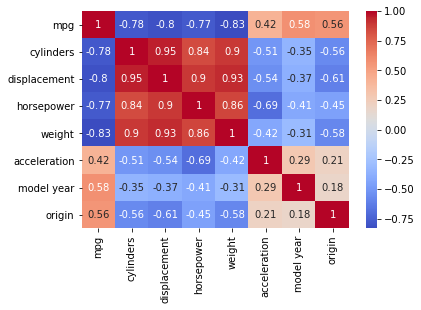

In [14]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')